In [ ]:
pip install gillespy2

In [ ]:
pip install --upgrade pip

In [66]:
pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 9.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.3/502.3 kB 8.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 8.3 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import gillespy2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

**My model**

In [94]:
def switching_process(paramateres_value=None):
    model = gillespy2.Model(name="switching_process")
    # Parameters
    alpha_minus = gillespy2.Parameter(name='alpha_minus', expression=15.0)
    beta_minus = gillespy2.Parameter(name='beta_minus', expression=0.0)
    alpha_plus = gillespy2.Parameter(name='alpha_plus', expression=0.0)
    beta_plus = gillespy2.Parameter(name='beta_plus', expression=0.0)
    switch_minus = gillespy2.Parameter(name='switch_minus', expression=0.0)
    switch_plus = gillespy2.Parameter(name='switch_plus', expression=0.0)
    model.add_parameter([alpha_minus, beta_minus, alpha_plus, beta_plus, switch_minus, switch_plus])
    # Species
    z_minus = gillespy2.Species(name='z_minus', initial_value=1)
    z_plus = gillespy2.Species(name='z_plus', initial_value=0)
    model.add_species([z_minus, z_plus])
    # Reactions
    birth_minus = gillespy2.Reaction(name="birth_minus", reactants={z_minus: 1}, products={z_minus: 2}, rate=alpha_minus) 
    death_minus = gillespy2.Reaction(name="death_minus", reactants={z_minus: 1}, products={}, rate=beta_minus)
    birth_plus = gillespy2.Reaction(name="birth_plus", reactants={z_plus: 1}, products={z_plus: 2}, rate=alpha_plus) 
    death_plus = gillespy2.Reaction(name="death_plus", reactants={z_plus: 1}, products={}, rate=beta_plus)
    switch_to_minus = gillespy2.Reaction(name="switch_to_minus", reactants={z_plus: 1}, products={z_minus: 1, z_plus: 1}, rate=switch_minus)
    switch_to_plus = gillespy2.Reaction(name="switch_to_plus", reactants={z_minus: 1}, products={z_minus: 1, z_plus: 1}, rate=switch_plus)
    model.add_reaction([birth_minus, death_minus, birth_plus, death_plus, switch_to_minus, switch_to_plus])
    # Timespan
    tspan = gillespy2.TimeSpan.linspace(t=1.2, num_points=101)
    model.timespan(tspan)
    return model

In [95]:
switching_model = switching_process()

CPU times: user 15.3 ms, sys: 17.3 ms, total: 32.6 ms
Wall time: 2min 13s


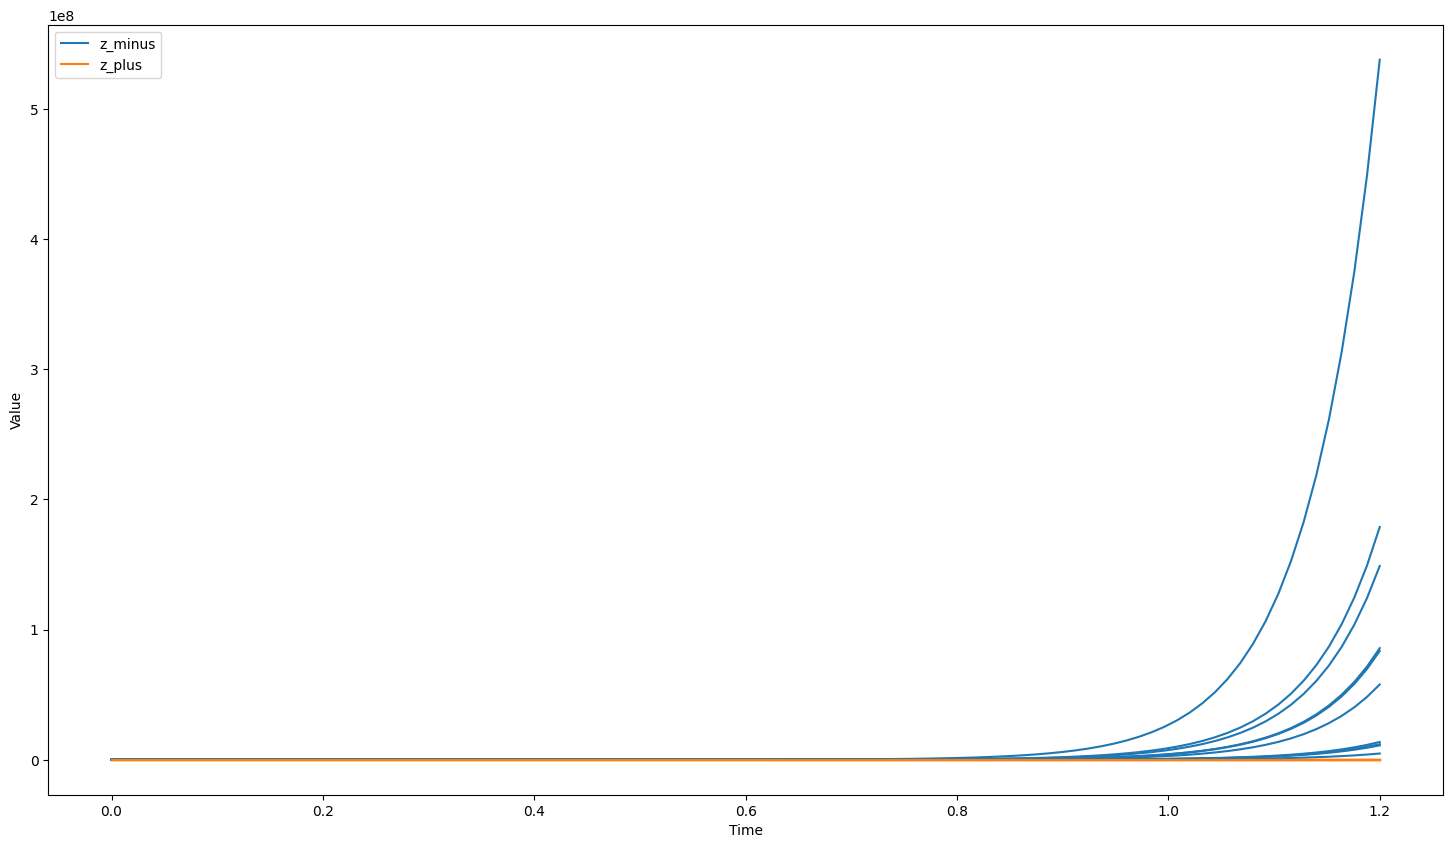

In [96]:
%time switching_results = switching_model.run(number_of_trajectories=10)

In [ ]:
switching_results = switching_model.run(number_of_trajectories=20)

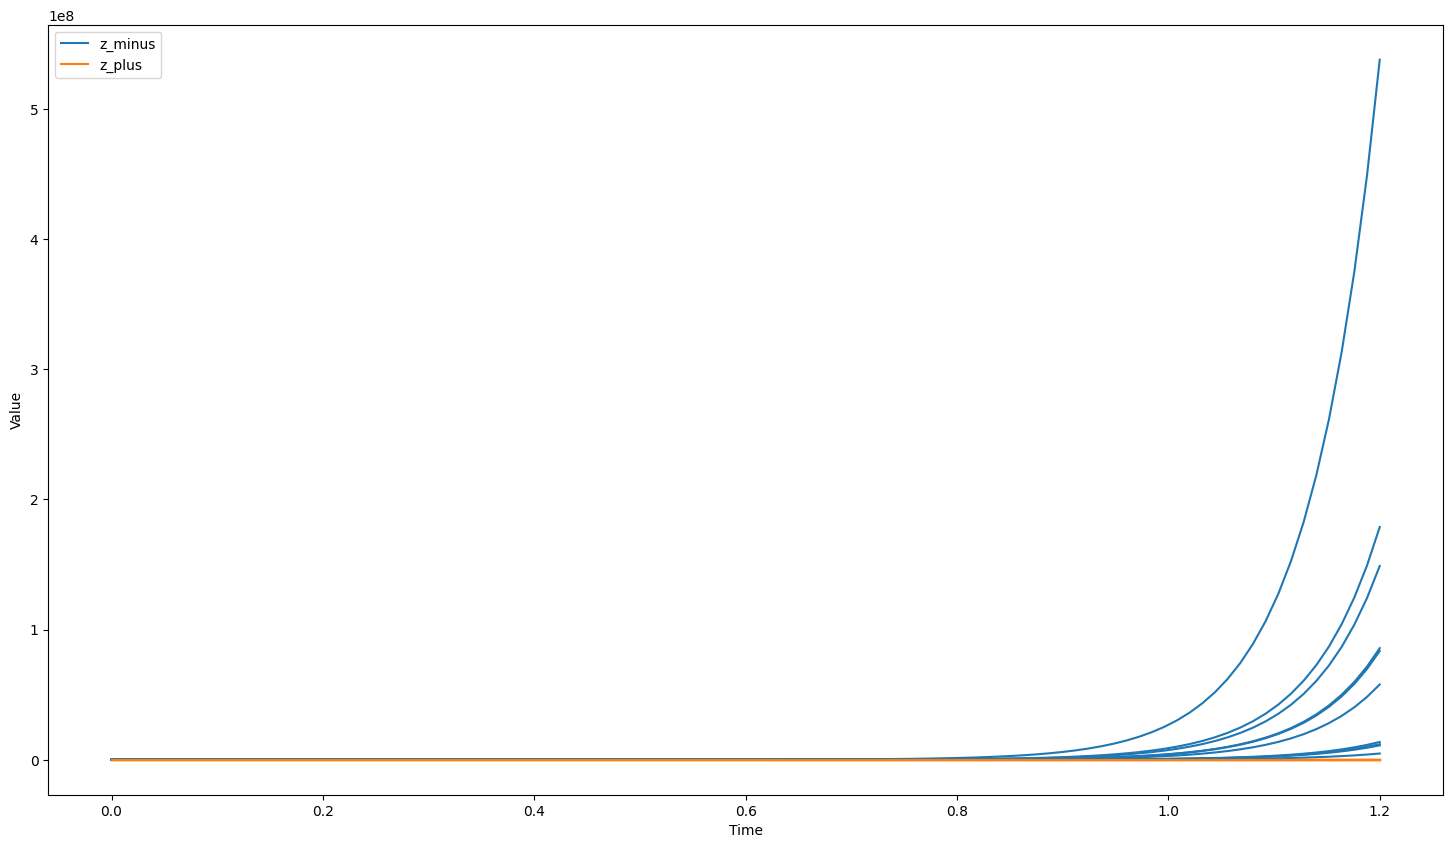

In [97]:
switching_results.plot()

In [47]:
results_avg = switching_results.average_ensemble() 
results_stddev = switching_results.stddev_ensemble()

In [70]:
type(np.array(results_avg['z_minus']))

numpy.ndarray

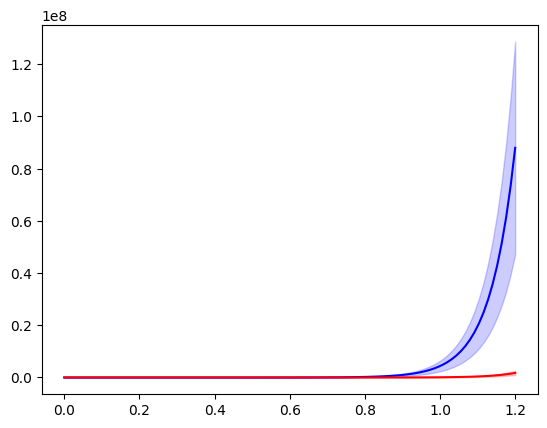

In [75]:
plt.plot(results_avg['time'],results_avg['z_minus'], '-', color = 'blue')
plt.plot(results_avg['time'],results_avg['z_plus'], '-', color = 'red')
plt.fill_between(results_avg['time'], np.array(results_avg['z_minus']) - np.array(results_stddev['z_minus']), np.array(results_avg['z_minus']) + np.array(results_stddev['z_minus']), color = 'blue', alpha = 0.2)
plt.fill_between(results_avg['time'], np.array(results_avg['z_plus']) - np.array(results_stddev['z_plus']), np.array(results_avg['z_plus']) + np.array(results_stddev['z_plus']), color = 'red', alpha = 0.2)

In [82]:
print(results_stddev['z_minus'])
print(results_avg['z_minus'])
np.array(results_stddev['z_minus'])/np.array(results_avg['z_minus'])

[0.0, 0.3, 0.4, 0.806225774829855, 0.9797958971132713, 1.4000000000000001, 1.61245154965971, 1.661324772583615, 2.227105745132009, 2.7367864366808017, 3.1048349392520045, 3.661966684720111, 4.4147480109288235, 6.296030495478877, 6.963476143421473, 7.539230729988306, 8.968834929911466, 10.537551897855593, 14.344336861632888, 17.153425313913253, 22.181974664127626, 26.081602711489953, 32.896960345904304, 38.84790856661399, 46.24381039663578, 55.339045889859726, 68.54954412685763, 82.1280098383006, 98.55358948308276, 116.21531740695802, 136.80062134361816, 159.7660790030224, 192.3934510319933, 232.93065491686576, 276.09355298521547, 333.5261459016369, 399.40431895511597, 481.6367926145178, 571.8135710176877, 681.71945109407, 813.306559668616, 989.6247824301895, 1188.664885491281, 1417.1832097509482, 1691.3292287428842, 2032.025514111474, 2440.919967962899, 2927.6004184314497, 3493.852738739857, 4167.53630937992, 4988.636848879662, 5962.924457847844, 7149.470014623462, 8623.300517203375, 1

array([0.        , 0.27272727, 0.33333333, 0.53748385, 0.54433105,
       0.63636364, 0.53748385, 0.43719073, 0.42828957, 0.46386211,
       0.41957229, 0.42091571, 0.43710376, 0.50774439, 0.49386356,
       0.42836538, 0.43538034, 0.41162312, 0.46572522, 0.45864774,
       0.45641923, 0.45359309, 0.4788495 , 0.47260229, 0.4675815 ,
       0.46620932, 0.47803029, 0.47555304, 0.47449971, 0.46861015,
       0.46641876, 0.45778246, 0.45873498, 0.46299077, 0.45748725,
       0.45495314, 0.45248025, 0.45437433, 0.45031782, 0.44917932,
       0.449291  , 0.45527202, 0.45712606, 0.4567875 , 0.45603139,
       0.45744704, 0.45881092, 0.45993126, 0.45912544, 0.45756374,
       0.45785373, 0.45738822, 0.45794416, 0.46114646, 0.4618927 ,
       0.46373737, 0.4640986 , 0.46362382, 0.4628192 , 0.46295276,
       0.4628019 , 0.46211401, 0.46243146, 0.46240216, 0.46275359,
       0.46275195, 0.46274876, 0.46311311, 0.46318831, 0.46313409,
       0.46308391, 0.46314411, 0.46309246, 0.46293522, 0.46290

/var/folders/2p/w6jdykws7gb84c2vkk83ggtr0000gn/T/ipykernel_21416/3660156421.py:2: RuntimeWarning: invalid value encountered in divide
  plt.plot(results_avg['time'],np.array(results_stddev['z_plus'])/np.array(results_avg['z_plus']), color = 'red')


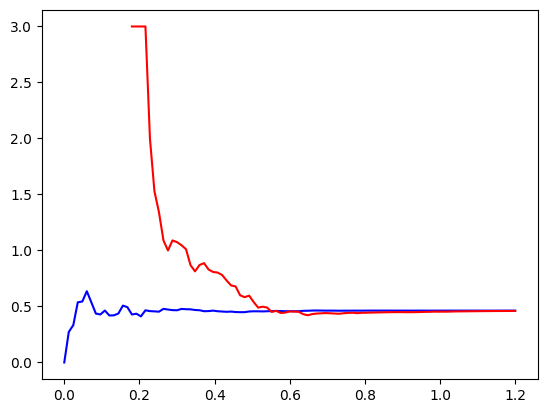

In [84]:
plt.plot(results_avg['time'],np.array(results_stddev['z_minus'])/np.array(results_avg['z_minus']), color = 'blue')
plt.plot(results_avg['time'],np.array(results_stddev['z_plus'])/np.array(results_avg['z_plus']), color = 'red')

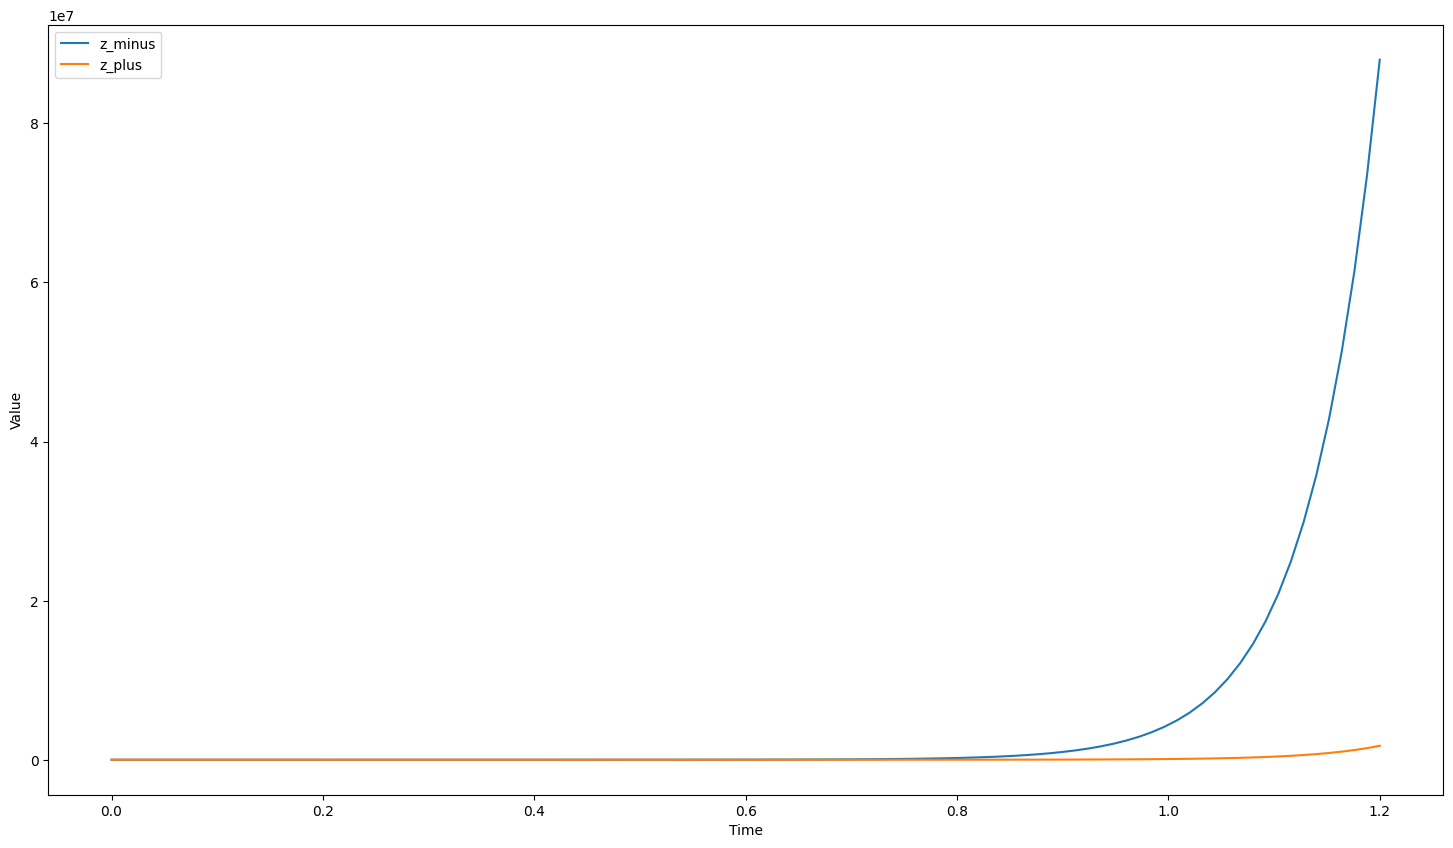

In [51]:
results_avg.plot()

In [32]:
type(trajectory)

gillespy2.core.results.Trajectory

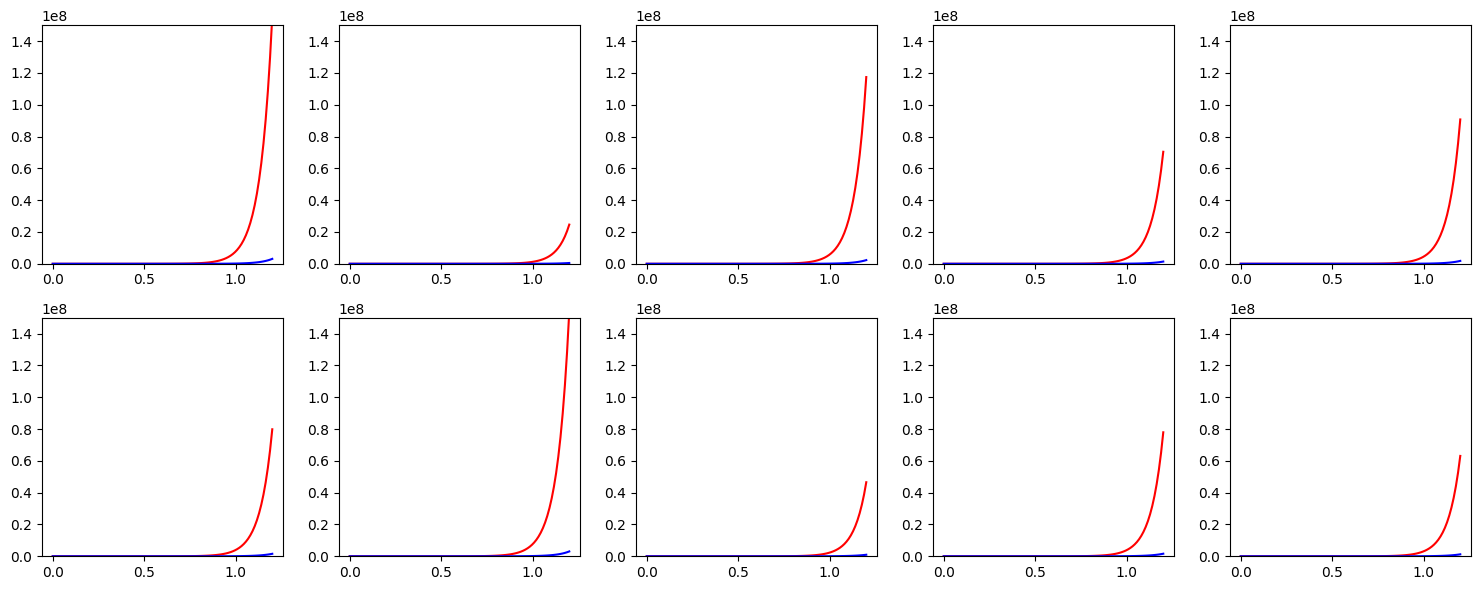

In [46]:
fig,axs = plt.subplots(2,5, figsize=(15,6))
for j in range(0,2):
    for i in range(0,5):
        axs[j,i].plot(switching_results[5*j+i]['time'], switching_results[i+j*5]['z_minus'], 'r')
        axs[j,i].plot(switching_results[5*j+i]['time'], switching_results[i+j*5]['z_plus'], 'b')
        axs[j,i].set_ylim(0,1.5e8)
        #axs[i,j].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
fig.tight_layout() 

In [98]:
df = pd.DataFrame(switching_results.to_array()[5], columns=['time', 'z_minus', 'z_plus'])

In [99]:
df.to_csv('./Gillespy2/no_switching.csv')

In [8]:
print(df)

     time    z_minus  z_plus
0    0.00        1.0     0.0
1    0.01        1.0     0.0
2    0.02        1.0     0.0
3    0.03        1.0     0.0
4    0.04        1.0     0.0
..    ...        ...     ...
96   0.96  2249673.0  4775.0
97   0.97  2614334.0  5547.0
98   0.98  3035863.0  6435.0
99   0.99  3527752.0  7415.0
100  1.00  4100070.0  8623.0

[101 rows x 3 columns]
